In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA #Principal components Analysis uses 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

In [2]:
def plot_gallery(images,titles,h,w,n_rows=3,n_col=4):
    plt.figure(figsize=(1.8 * n_col,2.4 *n_rows))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_rows *n_col):
        plt.subplot(n_rows,n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

In [3]:
dir_name = "dataset/dataset/faces/"
y = []
x = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = dir_name + person_name + '/'
    class_names.append(person_name)
    
    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        
        x.append(v)
        n_samples = n_samples + 1
        y.append(person_id)
        target_names.append(person_name)
        person_id = person_id + 1

# Move the conversion outside the inner loop
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)

n_features = x.shape[1]
print(y.shape, x.shape, target_names.shape)

n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



(450,) (450, 90000) (450,)
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 300 eigenvalues from 337 faces


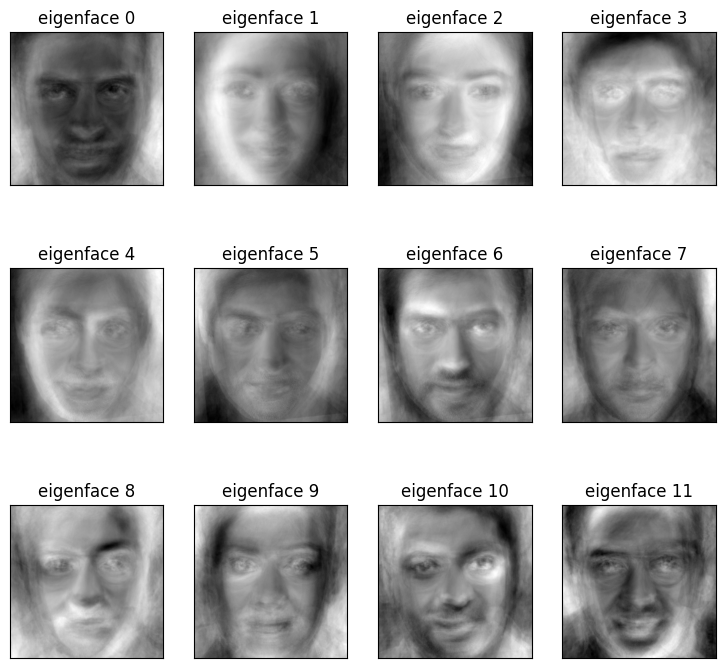

Projecting the input data on the the eigenfaces orthonormal basis
(337, 300) (113, 300)
Project done.


In [4]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

n_components=300

print("Extracting the top %d eigenvalues from %d faces" %(n_components,X_train.shape[0]))

#applying pca
pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(X_train)

eigenfaces=pca.components_.reshape((n_components,h,w))

eigenface_titles =["eigenface %d" %i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces,eigenface_titles,h,w)

plt.show()

print("Projecting the input data on the the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca .transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Adjusting parameters to satisfy the condition
X, y = make_classification(
    n_samples=450,
    n_features=90000,
    n_classes=450,  # Reduce the number of classes
    n_clusters_per_class=4,  # Reduce the number of clusters per class
    n_informative=2000,
    random_state=42
)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of unique classes
num_classes = len(set(y_train))

# Ensure there are more samples than classes
if len(y_train) <= num_classes:
    raise ValueError("The number of samples must be more than the number of classes.")

# Assuming X_train_pca, y_train, X_test_pca are properly defined
# Use the same split for the training set as for the original dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train_pca, y_train_pca)

# Transform the training and testing data using LDA
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

# Print a message indicating the completion of the projection
print("Project done.")
